In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup folder heirarchy and load in data

In [2]:
DIR_DATA_RAW = os.path.join(".", "data", "external")

for dir, dirs, files in os.walk(DIR_DATA_RAW):
    for file in files:
        print(os.path.join(DIR_DATA_RAW, file))

.\data\external\artists.csv
.\data\external\data_by_artist_o.csv
.\data\external\data_by_genres_o.csv
.\data\external\data_by_year_o.csv
.\data\external\data_o.csv
.\data\external\dict_artists.json
.\data\external\tracks.csv


In [3]:
# Load data
df = pd.read_csv(os.path.join(DIR_DATA_RAW, 'tracks.csv'), index_col=0, parse_dates=['release_date'])

# Get a feel for the dataset

In [4]:
df

,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
id,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4


In [5]:
YEARS_OF_DATA = 100
df = df[df.release_date > df.release_date.max() - pd.DateOffset(years=YEARS_OF_DATA)].sort_values(by='release_date', ascending=False)

In [6]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586671.000000,5.866710e+05,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000
mean,27.570067,2.300512e+05,0.044086,0.563594,0.542036,5.221608,-10.206076,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464817,3.873382
std,18.370655,1.265262e+05,0.205286,0.166103,0.251923,3.519424,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764117,0.473163
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [7]:
df.info()  # 587k rows, all numerical except name, artists, id_artists and release_date

<class 'pandas.core.frame.DataFrame'>
Index: 586671 entries, 0DzTFqNNL2RukngVlkjbKA to 5CObFpQdx70P3mNR1WRjsu
Data columns (total 19 columns):
name                586600 non-null object
popularity          586671 non-null int64
duration_ms         586671 non-null int64
explicit            586671 non-null int64
artists             586671 non-null object
id_artists          586671 non-null object
release_date        586671 non-null datetime64[ns]
danceability        586671 non-null float64
energy              586671 non-null float64
key                 586671 non-null int64
loudness            586671 non-null float64
mode                586671 non-null int64
speechiness         586671 non-null float64
acousticness        586671 non-null float64
instrumentalness    586671 non-null float64
liveness            586671 non-null float64
valence             586671 non-null float64
tempo               586671 non-null float64
time_signature      586671 non-null int64
dtypes: datetime64[ns](1), fl

In [8]:
df.isnull().sum()  # look at NaN entries

name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [9]:
# see if there's anything interesting about NaN rows that might indicate larger problems with dataset
df.loc[df.name.isnull()]

,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
id,,,,,,,,,,,,,,,,,,,
1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4
4xyBq8t4nkUKH8s28j6ZoD,NaN,24,254000,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.390,0.452,7,-9.900,1,0.0361,0.7370,0.000000,0.1110,0.662,94.630,4
4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2DyOPZlmzeX1ksoU7xPfR9,NaN,0,193881,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.287,0.276,8,-16.278,1,0.0471,0.9940,0.030600,0.3490,0.512,67.967,3
1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
2DPL9XgEjygqmZvqeaIA8L,NaN,0,179907,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.441,0.146,3,-12.692,0,0.0780,0.9950,0.585000,0.1720,0.515,67.431,4


In [10]:
#no larger issues identified - drop rows
df.dropna(inplace=True)

# drop rows with time_signature as 0
df = df[df.time_signature != 0]
df.describe()['time_signature']['min']

# duration in seconds
df['duration_ms'] = df.duration_ms/1.0e3
df.rename(columns = {'duration_ms': 'duration_s'}, inplace=True)
dtypes = df.dtypes.value_counts()

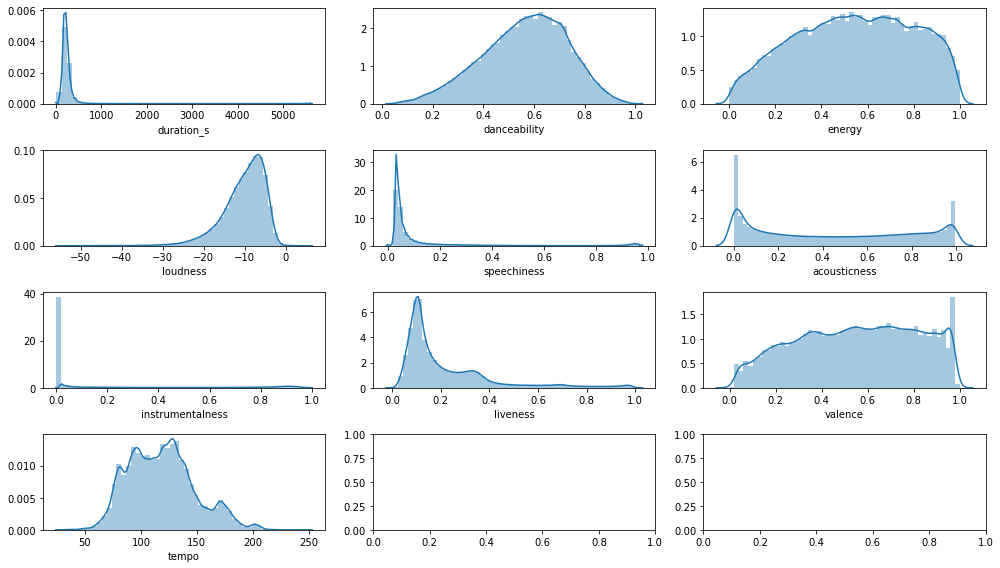

In [11]:
# separate categorical and numerical entries as they are analysed differently
y = ['popularity']  # column of interest
cols_numerical = ['duration_s', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
cols_categorical = ['explicit', 'release_date', 'key', 'mode', 'time_signature']


# plot distributions of each numerical feature
cols = 3  # 3 column grid
rows = int(np.ceil(1.0*len(cols_numerical)/3))
figure, axes = plt.subplots(rows, cols, figsize=(14,8)) # create grid (may be a few spare plots in the final row)

i = 0
j = 0
for col in cols_numerical:
    sns.distplot(df[col], ax=axes[i, j]) 
    j += 1 # next column
    if(j >= cols): # if we would next plot at column 4, move to first column in the next row
        i += 1
        j = 0

figure.tight_layout() # fix spacing issues

# Top 10 tracks in key of C minor

In [12]:
df[(df['key'] == 0) & (df['mode'] == 0)].sort_values('popularity', ascending=False)[['name', 'artists', 'popularity', 'key', 'mode']].head(10)

,name,artists,popularity,key,mode
id,,,,,
3iw6V4LH7yPj1ESORX9RIN,Wellerman - Sea Shanty / 220 KID x Billen Ted ...,"['Nathan Evans', '220 KID', 'Billen Ted']",92,0,0
3aQem4jVGdhtg116TmJnHz,What’s Next,['Drake'],91,0,0
21N4Buj4xsyLb218lYle61,Chica Ideal,"['Sebastian Yatra', 'Guaynaa']",87,0,0
1xQ6trAsedVPCdbtDAmk0c,Savage Love (Laxed - Siren Beat),"['Jawsh 685', 'Jason Derulo']",87,0,0
7fBv7CLKzipRk6EC6TWHOB,The Hills,['The Weeknd'],87,0,0
7m9OqQk4RVRkw9JJdeAw96,Jocelyn Flores,['XXXTENTACION'],87,0,0
1IIKrJVP1C9N7iPtG6eOsK,Go Crazy,"['Chris Brown', 'Young Thug']",85,0,0
3dhjNA0jGA8vHBQ1VdD6vV,I Feel It Coming,"['The Weeknd', 'Daft Punk']",84,0,0
7AQim7LbvFVZJE3O8TYgf2,Fuck Love (feat. Trippie Redd),"['XXXTENTACION', 'Trippie Redd']",84,0,0


# Top 3 most popular solo artists
### does not account for solo + collaborations; accounts for solo releases only

In [13]:
a = df.copy()
a = df.groupby('artists').mean().sort_values(by='popularity', ascending=False)  # group artists and sort by mean popularity
a['num_artists'] = [len(x.split(', ')) for x in a.index]  # create column that counts number of artists for each song
a[a['num_artists'] == 1].head(3)  # display top 3 solo artists (already sorted in descending order from two lines ago)

,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,num_artists
artists,,,,,,,,,,,,,,,,
['Regard'],87.0,157.606,0.0,0.880,0.751,7.0,-4.258,0.0,0.0874,0.1770,0.000064,0.1060,0.884,117.948,4.0,1
['Ritt Momney'],87.0,210.463,0.0,0.399,0.491,6.0,-10.778,0.0,0.0538,0.0563,0.000890,0.1100,0.151,91.066,4.0,1
['ElyOtto'],87.0,80.081,1.0,0.748,0.734,0.0,-6.499,1.0,0.1240,0.5240,0.000012,0.0975,0.368,97.753,4.0,1


# What makes a song popular?

In [14]:
df_corr = df[cols_numerical + y].corr() # correlation coefficients don't make sense for categorical columns

## Explore correlation coefficients

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x0000019BA5533B08>>

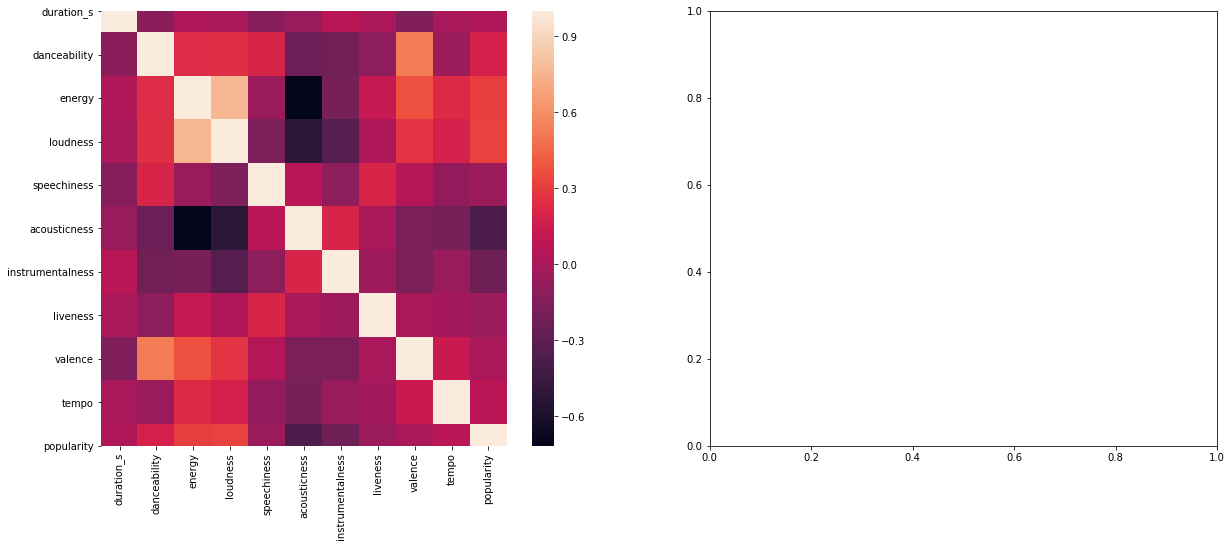

In [15]:
CORRELATION_THRESH = 0.2  # arbitrary correlation threshold (0 to 1) to highlight most correlated entries on right-hand side
highly_correlated_indices = np.multiply(df_corr.abs() > CORRELATION_THRESH, df_corr.abs() != 1)  
# .abs() to account for negatively-correlated entries
# !=1 to remove the main diagonal (entries are, of course, perfectly correlated with themselves)

np.multiply(highly_correlated_indices, df_corr).style.background_gradient(cmap='viridis')

f, a = plt.subplots(1,2, figsize=(20,8));
plt.subplot(1,2,1)
sns.heatmap(df_corr);
a[0].set

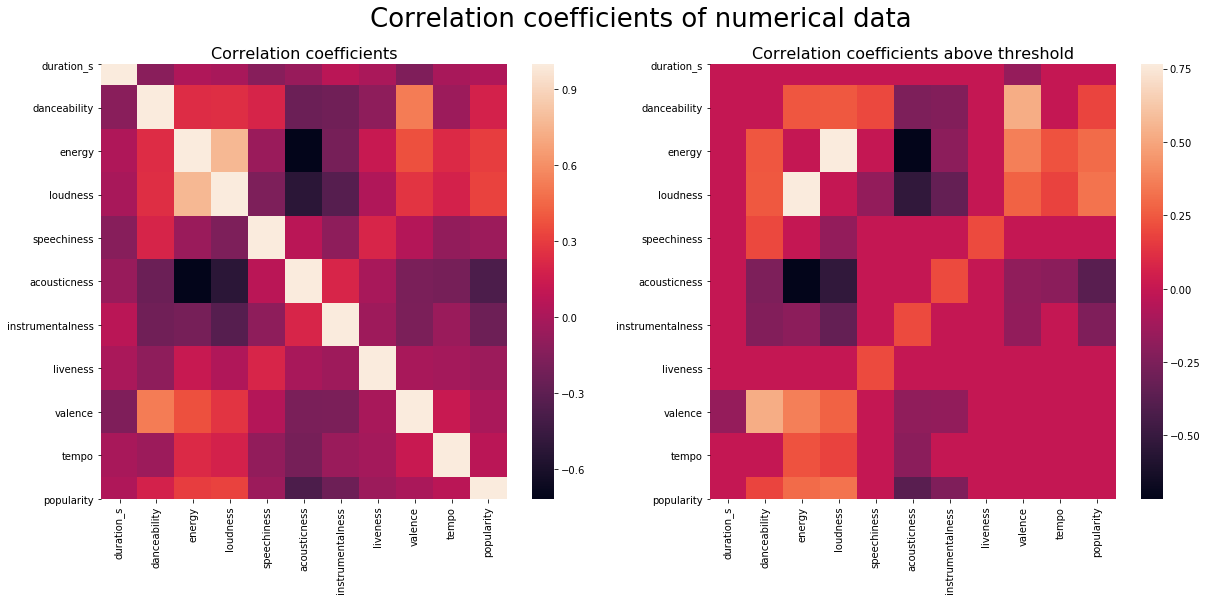

In [16]:
# arbitrary correlation threshold (0 to 1) to highlight most correlated entries on right-hand side
CORRELATION_THRESH = 0.15
highly_correlated_indices = np.multiply(df_corr.abs() > CORRELATION_THRESH, df_corr.abs() != 1)  
# .abs() to account for negatively-correlated entries
# !=1 to remove the main diagonal (entries are, of course, perfectly correlated with themselves)

f, a = plt.subplots(1,2, figsize=(20,8));
f.suptitle('Correlation coefficients of numerical data', fontsize=26)

plt.subplot(1,2,1).set_title('Correlation coefficients', fontsize=16)
sns.heatmap(df_corr);

plt.subplot(1,2,2).set_title('Correlation coefficients above threshold', fontsize=16)
sns.heatmap(np.multiply(highly_correlated_indices, df_corr));

# energy and loudness are highly correlated
# drop loudness or energy to avoid highly correlated columns disproportionately effecting results

In [17]:
# look at popularity column and remove entry w.r.t. itself
df_corr['popularity'].drop('popularity').sort_values(ascending=False)

loudness            0.328544
energy              0.302883
danceability        0.187797
tempo               0.071843
duration_s          0.027453
valence             0.004712
speechiness        -0.047399
liveness           -0.048920
instrumentalness   -0.237244
acousticness       -0.370964
Name: popularity, dtype: float64

In [18]:
# energy is highly correlated with loudness, but is less correlated with popularity than loudness, so drop energy
cols_numerical.remove('energy')
df.drop(['energy'], axis=1, inplace=True)

## Explore attributes that contain discrete data

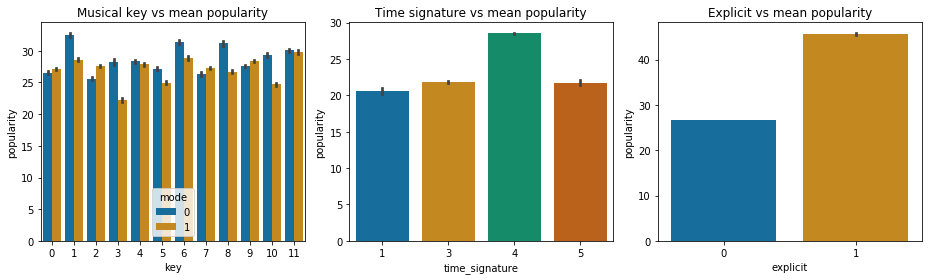

In [19]:
rows = 1
cols = 3
plt.subplots(rows,cols, figsize=(13,4))
sns.set_palette('colorblind')

# musical key only makes sense plotted with the mode (major or minor)
plt.subplot(rows,cols,1)
plt.title('Musical key vs mean popularity')
sns.barplot(x='key', y='popularity', hue='mode', data=df)

plt.subplot(rows,cols,2)
plt.title('Time signature vs mean popularity')
sns.barplot(x='time_signature', y='popularity', data=df);

plt.subplot(rows,cols,3)
plt.title('Explicit vs mean popularity')
sns.barplot(x='explicit', y='popularity', data=df);

plt.tight_layout()

## Findings so far
- Most popular keys are 1, 6 and 7, with mode 0, which corresponds to C# minor, F# minor and G# minor
- 4/4 time signature is most popular on average
- Explicit songs are more popular than non-explicit songs

# Explore trends over time

In [20]:
df['year'] = [x.year for x in df.release_date]  # add column for year of release
df[['year','release_date']]

,year,release_date
id,,
0DzTFqNNL2RukngVlkjbKA,2021,2021-04-16
2romdyQNQM3AYoNWLc12wD,2021,2021-04-16
6ILjkEufgyZ7NyLnrpr6zr,2021,2021-04-16
3MXopdUtwhQPxDOdj39oDA,2021,2021-04-16
1isEADg1EJ9dqQUjsHjOhS,2021,2021-04-16
...,...,...
4yTwNqT53nEaIMMxDsnNr3,1922,1922-01-01
0wG1anJSasIRZ8wu9vvYOC,1922,1922-01-01
12VN7yyLDADH7k5BJbyO3j,1922,1922-01-01


In [21]:
tracks_by_year = df.groupby('year').mean()  # group by year
tracks_by_year = tracks_by_year.sort_values('year')
# doesn't make sense to use mean value of categorical fields, so drop categorical columns
tracks_by_year.drop(['explicit', 'key', 'mode', 'time_signature'], axis=1, inplace=True)
tracks_by_year

,popularity,duration_s,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
year,,,,,,,,,,
1922,0.057971,165.202185,0.541207,-14.073036,0.258699,0.892674,0.328275,0.246547,0.572387,110.133703
1923,1.575342,156.975915,0.637332,-16.351921,0.552072,0.859965,0.157659,0.225396,0.671967,109.552648
1924,0.614286,189.324175,0.596170,-13.250265,0.376995,0.865648,0.337091,0.203493,0.557578,120.026741
1925,1.433221,191.870484,0.625706,-14.371232,0.309810,0.924455,0.279093,0.258593,0.643751,115.435071
1926,1.938776,165.946540,0.622113,-15.929906,0.356952,0.785739,0.323416,0.211447,0.539702,113.386792
...,...,...,...,...,...,...,...,...,...,...
2017,42.198397,230.009912,0.626874,-7.145313,0.100823,0.277536,0.087672,0.200527,0.495469,121.704836
2018,42.133736,220.945919,0.635614,-7.367837,0.108401,0.277820,0.097669,0.198078,0.484092,121.895834
2019,44.916758,217.029603,0.651146,-7.405970,0.111412,0.293356,0.080572,0.189986,0.495293,122.290781


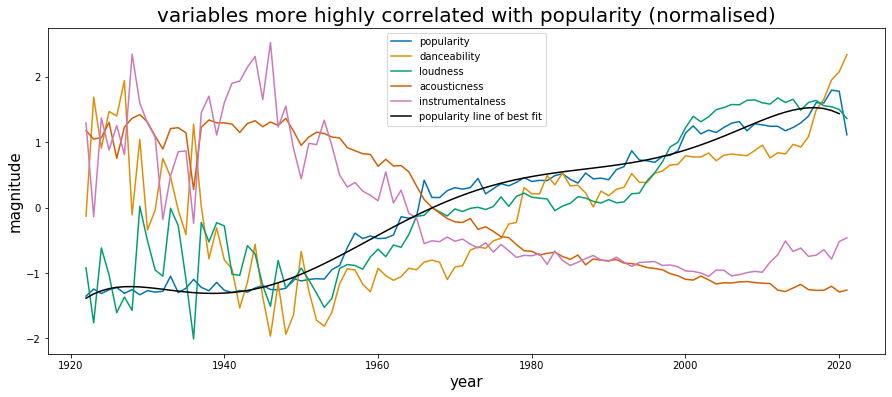

In [22]:
# filter out low correlation noise
tracks_by_year_normalised = tracks_by_year.copy()
CORRELATION_THRESH = 0.15 

# normalise variables to improve readibility from graph
for col in tracks_by_year.columns:  
    mean = tracks_by_year[col].mean()
    std_dev = tracks_by_year[col].std()
    tracks_by_year_normalised[col] = (tracks_by_year[col] - mean)/std_dev
    
# create plot
figure, axes = plt.subplots(figsize=(15,6));
l = []  # initiate list for legend
for col in tracks_by_year_normalised.columns:  # plot if correlated enough with popularity
    if(df_corr['popularity'].abs()[col] > CORRELATION_THRESH):
        sns.lineplot(x=tracks_by_year_normalised.index, y=col, data=tracks_by_year_normalised)
        l.append(col)

#  looks like at least 4 local minima and maxima on popularity curve
#  choose 5th degree polynomial or greater
d = 6  # polynomial degree
curve = np.poly1d(np.polyfit(tracks_by_year_normalised.index, tracks_by_year_normalised.popularity, d));  # get poly coefficients
x = range(tracks_by_year.index.min(), tracks_by_year.index.max());  # create array of integers from start year to end year
plt.plot(x, curve(x), color='black')  # overlay best fit curve with calculated (x, curve(x))

l.append('popularity line of best fit')
plt.legend(labels=l);
axes.set_ylabel('magnitude', fontsize=15);
axes.set_xlabel('year', fontsize=15);
axes.set_title('variables more highly correlated with popularity (normalised)', fontsize=20);


# Conclusion

## To maximise chances at writing a pop hit, write a song:
- in one of the following keys: C#, F# or G# minor
- in 4/4 time
- that you can dance to (turn up the volume)
- include some explicit language
- must not be purely instrumental
- must not be accoustic
